# Text Classification

In [1]:
import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
#Load the dataset
train_data = fetch_20newsgroups(subset='train', shuffle=True,download_if_missing=True)
test_data = fetch_20newsgroups(subset='test', shuffle=True,download_if_missing=True)

In [3]:
#Explore the dataset
print(train_data.description)

the 20 newsgroups by date dataset


The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents spead evenly accross 20 different newsgroups.

Official Page: http://qwone.com/~jason/20Newsgroups/

In [4]:
#Classes
print(train_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
#Data
print(train_data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [6]:
#Converting text into vectors using bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(train_data.data)
print('Shape of Tfidf matrix:',X_train_tfidf.shape)

Shape of Tfidf matrix: (11314, 130107)


Let's try to build the model using a popular ML approach, Naive Bayes.

In [7]:
#Using MultinomialNB classifier on training data
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf = clf.fit(X_train_tfidf,train_data.target)

In [8]:
#Build a pipeline

nb_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])
nb_clf = nb_clf.fit(train_data.data,train_data.target)

In [9]:
nb_predicted_value = nb_clf.predict(test_data.data)
nb_accuracy = nb_clf.score(test_data.data,test_data.target)

print('Accuracy is:',nb_accuracy)

Accuracy is: 0.7738980350504514


Now, let's try Logistic Regression.

In [10]:
from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])
lr_clf = lr_clf.fit(train_data.data,train_data.target)

In [11]:
lr_predicted_value = lr_clf.predict(test_data.data)
lr_accuracy = lr_clf.score(test_data.data,test_data.target)

print('Accuracy is:', lr_accuracy)

Accuracy is: 0.8279341476367499


We have used the default parameters here. We can tune these by using GridSearch to improve accuracy.

In [12]:
#Check performance using confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=test_data.target, y_pred=lr_predicted_value)

In [13]:
#Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

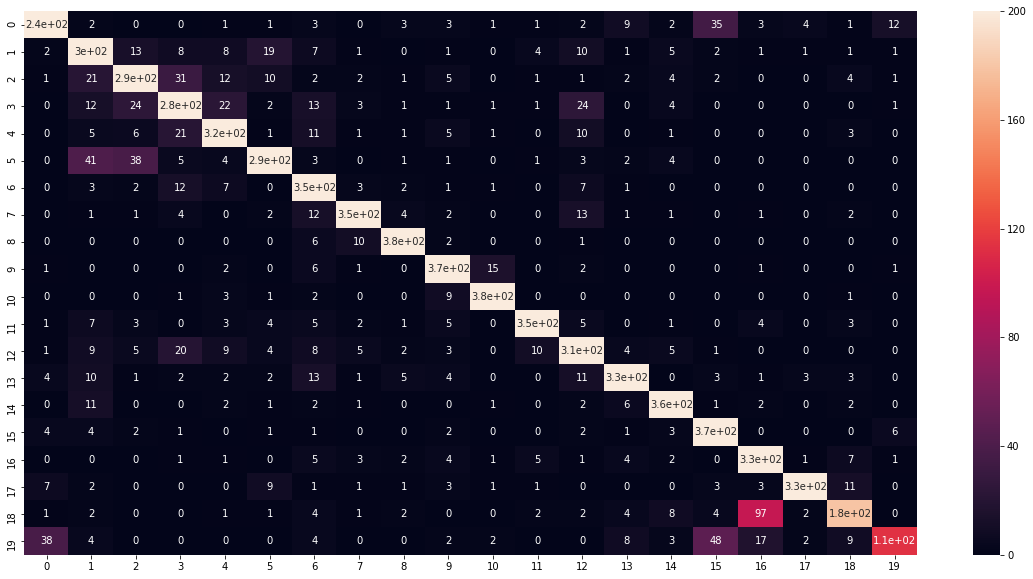

In [14]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf,annot=True,vmax=200)

Let's check if we can improve the accuracy by removing stop words from the data as for cases of text classification, stop words like the, then, a, of, etc. are not useful.

In [22]:
nlp = spacy.load('en')

In [24]:
#Trying out spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'g

In [25]:
print("Number of stop words:", len(STOP_WORDS))

Number of stop words: 305


In [27]:
#Adding my name as a stop-word
STOP_WORDS.add("Kaushik")
print("Number of stop words now:", len(STOP_WORDS))

Number of stop words now: 306


In [28]:
doc = nlp("I am learning Natural Language Processing using Spacy")
print(doc)

I am learning Natural Language Processing using Spacy


In [29]:
#Tokenization
for token in doc:
    print(token)

I
am
learning
Natural
Language
Processing
using
Spacy


In [31]:
#Removing puntuations and stop words
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
print(simplified_doc)

[I, learning, Natural, Language, Processing, Spacy]


In [34]:
#Lemmatization and POS tagging
for token in simplified_doc:
    print('Lemmatization:',token.lemma_)
    print('POS Tag:',token.pos_)
    print('POS Tag in detail:',token.tag_)
    print('Relation between tokens (Syntactic Dependency):',token.dep_)

Lemmatization: -PRON-
POS Tag: PRON
POS Tag in detail: PRP
Relation between tokens (Syntactic Dependency): nsubj
Lemmatization: learn
POS Tag: VERB
POS Tag in detail: VBG
Relation between tokens (Syntactic Dependency): ROOT
Lemmatization: natural
POS Tag: PROPN
POS Tag in detail: NNP
Relation between tokens (Syntactic Dependency): compound
Lemmatization: language
POS Tag: PROPN
POS Tag in detail: NNP
Relation between tokens (Syntactic Dependency): compound
Lemmatization: processing
POS Tag: PROPN
POS Tag in detail: NNP
Relation between tokens (Syntactic Dependency): dobj
Lemmatization: spacy
POS Tag: PROPN
POS Tag in detail: NNP
Relation between tokens (Syntactic Dependency): dobj


Now, back to our classifier!

In [35]:
#Create a tokenizer using spacy
from spacy.lang.en import English
tokenizer = English().Defaults.create_tokenizer(nlp)

In [36]:
#Return the tokenized words
def classifier_tokenizer(document):
    return [token.text for token in tokenizer(document)]

In [38]:
new_lr_clf = Pipeline([('tfidf',TfidfVectorizer(tokenizer=classifier_tokenizer,stop_words=list(STOP_WORDS))),('clf',LogisticRegression())])
new_lr_clf = new_lr_clf.fit(train_data.data,train_data.target)

print('Accuracy:', new_lr_clf.score(test_data.data,test_data.target))

Accuracy: 0.7818640467339352
